In this assignment students have to transform iris data into 3 dimensionsand plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data=pd.read_csv(url,header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.rename(columns = {0 : 'sepal_length',1 : 'sepal_width',2:'petal_length',3:'petal_width',4:'target'}, inplace = True)

In [13]:
x=data.iloc[:,0:4].values
y=data.iloc[:,-1].values

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=3)
pc=pca.fit_transform(x)
df1=pd.DataFrame(data=pc,columns=['pc1','pc2','pc3'])

In [28]:
df=pd.concat([df1,data[['target']]],axis=1)
df

,pc1,pc2,pc3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


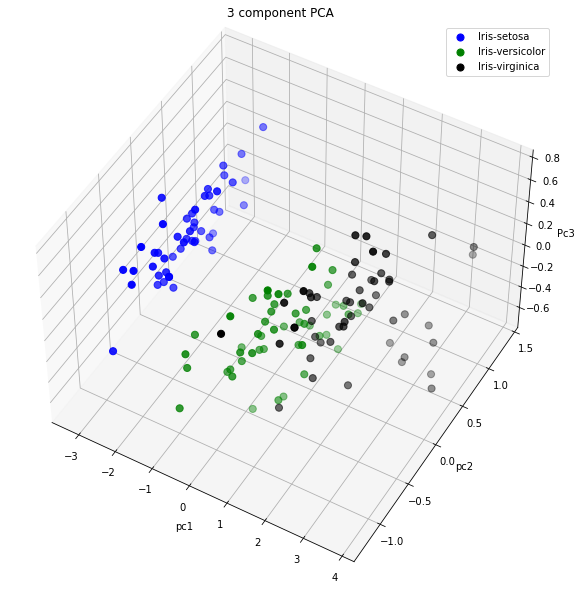

In [39]:
fig = plt.figure(1, figsize=(8, 8))
ax=Axes3D(fig, rect=[0, 0, .95, 1], elev=48)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'g', 'black']
for target, color in zip(targets,colors):
    i = df['target'] == target
    ax.scatter(df.loc[i, 'pc1'], df.loc[i, 'pc2'], df.loc[i, 'pc3'], c = color, s = 50)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('Pc3')
ax.set_title('3 component PCA')
ax.legend(targets)
ax.grid()
